### Import lib

In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from nltk.tokenize import RegexpTokenizer
from nltk.stem.snowball import SnowballStemmer
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

### Import phishing_site_urls dataset

In [5]:
urls_df = pd.read_csv(r'phishing_site_urls.csv')

urls_df.head()

,URL,Label
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad
3,mail.printakid.com/www.online.americanexpress....,bad
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad


In [6]:
urls_df.tail()

,URL,Label
549341,23.227.196.215/,bad
549342,apple-checker.org/,bad
549343,apple-iclods.org/,bad
549344,apple-uptoday.org/,bad
549345,apple-search.info,bad


In [7]:
urls_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549346 entries, 0 to 549345
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   URL     549346 non-null  object
 1   Label   549346 non-null  object
dtypes: object(2)
memory usage: 8.4+ MB


In [8]:
urls_df.isnull().sum()

URL      0
Label    0
dtype: int64

In [9]:
label_counter = pd.DataFrame(urls_df.Label.value_counts())

In [10]:
print(label_counter.Label)
fig = px.bar(label_counter, x=label_counter.index, y=label_counter.Label)
fig.show()

good    392924
bad     156422
Name: Label, dtype: int64


### Preprocessing

In [11]:
tokenizer = RegexpTokenizer(r'[A-Za-z]+')
urls_df.URL[0]

'nobell.it/70ffb52d079109dca5664cce6f317373782/login.SkyPe.com/en/cgi-bin/verification/login/70ffb52d079109dca5664cce6f317373/index.php?cmd=_profile-ach&outdated_page_tmpl=p/gen/failed-to-load&nav=0.5.1&login_access=1322408526'

In [12]:
tokenizer.tokenize(urls_df.URL[0])

['nobell',
 'it',
 'ffb',
 'd',
 'dca',
 'cce',
 'f',
 'login',
 'SkyPe',
 'com',
 'en',
 'cgi',
 'bin',
 'verification',
 'login',
 'ffb',
 'd',
 'dca',
 'cce',
 'f',
 'index',
 'php',
 'cmd',
 'profile',
 'ach',
 'outdated',
 'page',
 'tmpl',
 'p',
 'gen',
 'failed',
 'to',
 'load',
 'nav',
 'login',
 'access']

In [13]:
urls_df['text_tokenized'] = urls_df.URL.map(lambda t: tokenizer.tokenize(t))

In [14]:
urls_df.sample(5)

,URL,Label,text_tokenized
24840,freecoupons4you.co.uk/wp-content/themes/mymag/...,bad,"[freecoupons, you, co, uk, wp, content, themes..."
98615,zippedonlinedoc.com/edit/docs/,bad,"[zippedonlinedoc, com, edit, docs]"
289779,beaumontenterprise.com/news/article/Convict-ac...,good,"[beaumontenterprise, com, news, article, Convi..."
370341,last.fm/music/Black+Diamond+Bay,good,"[last, fm, music, Black, Diamond, Bay]"
110076,terraplenar.com.br/1ac/!d.html,bad,"[terraplenar, com, br, ac, d, html]"


In [15]:
stemmer = SnowballStemmer("english")
urls_df['text_stemmed'] = urls_df['text_tokenized'].map(lambda l: [stemmer.stem(word) for word in l])


In [16]:
urls_df.sample(5)

,URL,Label,text_tokenized,text_stemmed
468834,yellowpages.com/chicago-il/laundry-and-dry-cle...,good,"[yellowpages, com, chicago, il, laundry, and, ...","[yellowpag, com, chicago, il, laundri, and, dr..."
467880,yardbarker.com/nfl/teams/Detroit_Lions/52,good,"[yardbarker, com, nfl, teams, Detroit, Lions]","[yardbark, com, nfl, team, detroit, lion]"
448439,toonopolis.com/2011/07/09/scooby-doo-mystery-i...,good,"[toonopolis, com, scooby, doo, mystery, incorp...","[toonopoli, com, scoobi, doo, mysteri, incorpo..."
263271,123people.ca/s/paul+lambert,good,"[people, ca, s, paul, lambert]","[peopl, ca, s, paul, lambert]"
164697,diccionario.sensagent.com/polish+army+order+of...,good,"[diccionario, sensagent, com, polish, army, or...","[diccionario, sensag, com, polish, armi, order..."


In [17]:
urls_df['text_sent'] = urls_df['text_stemmed'].map(lambda l: ' '.join(l))

In [18]:
urls_df.sample(5)

,URL,Label,text_tokenized,text_stemmed,text_sent
505145,www.stocksmarkets.net/,bad,"[www, stocksmarkets, net]","[www, stocksmarket, net]",www stocksmarket net
89598,www.ti.com/avigo/,good,"[www, ti, com, avigo]","[www, ti, com, avigo]",www ti com avigo
43943,pleakot.com/cheaT59x6ndj3bu18624/3v15pr72uwyqm...,bad,"[pleakot, com, cheaT, x, ndj, bu, v, pr, uwyqm...","[pleakot, com, cheat, x, ndj, bu, v, pr, uwyqm...",pleakot com cheat x ndj bu v pr uwyqmglmcndxd ...
167714,easternshore.craigslist.org/apa/2705301892.html,good,"[easternshore, craigslist, org, apa, html]","[easternshor, craigslist, org, apa, html]",easternshor craigslist org apa html
320819,eliteprospects.com/team.php?team=114,good,"[eliteprospects, com, team, php, team]","[eliteprospect, com, team, php, team]",eliteprospect com team php team


### Visualization

In [19]:
bad_sites = urls_df[urls_df.Label == 'bad']
good_sites = urls_df[urls_df.Label == 'good']

In [20]:
bad_sites.head()

,URL,Label,text_tokenized,text_stemmed,text_sent
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad,"[nobell, it, ffb, d, dca, cce, f, login, SkyPe...","[nobel, it, ffb, d, dca, cce, f, login, skype,...",nobel it ffb d dca cce f login skype com en cg...
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad,"[www, dghjdgf, com, paypal, co, uk, cycgi, bin...","[www, dghjdgf, com, paypal, co, uk, cycgi, bin...",www dghjdgf com paypal co uk cycgi bin webscrc...
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad,"[serviciosbys, com, paypal, cgi, bin, get, int...","[serviciosbi, com, paypal, cgi, bin, get, into...",serviciosbi com paypal cgi bin get into herf s...
3,mail.printakid.com/www.online.americanexpress....,bad,"[mail, printakid, com, www, online, americanex...","[mail, printakid, com, www, onlin, americanexp...",mail printakid com www onlin americanexpress c...
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad,"[thewhiskeydregs, com, wp, content, themes, wi...","[thewhiskeydreg, com, wp, content, theme, wide...",thewhiskeydreg com wp content theme widescreen...


In [21]:
good_sites.head()

,URL,Label,text_tokenized,text_stemmed,text_sent
18231,esxcc.com/js/index.htm?us.battle.net/noghn/en/...,good,"[esxcc, com, js, index, htm, us, battle, net, ...","[esxcc, com, js, index, htm, us, battl, net, n...",esxcc com js index htm us battl net noghn en r...
18232,wwweira¯&nvinip¿ncH¯wVö%ÆåyDaHðû/ÏyEùuË\nÓ6...,good,"[www, eira, nvinip, ncH, wV, yDaH, yE, u, rT, ...","[www, eira, nvinip, nch, wv, ydah, ye, u, rt, ...",www eira nvinip nch wv ydah ye u rt u g m i xz...
18233,'www.institutocgr.coo/web/media/syqvem/dk-óij...,good,"[www, institutocgr, coo, web, media, syqvem, d...","[www, institutocgr, coo, web, media, syqvem, d...",www institutocgr coo web media syqvem dk ij r ...
18234,Yìê koãÕ»Î§DéÎl½ñ¡ââqtò¸/à; Í,good,"[Y, ko, D, l, qt]","[y, ko, d, l, qt]",y ko d l qt
18236,ruta89fm.com/images/AS@Vies/1i75cf7b16vc<Fd16...,good,"[ruta, fm, com, images, AS, Vies, i, cf, b, vc...","[ruta, fm, com, imag, as, vie, i, cf, b, vc, f...",ruta fm com imag as vie i cf b vc f d b g sd v...


### Creating Model

In [22]:
cv = CountVectorizer()
feature = cv.fit_transform(urls_df.text_sent)

In [23]:
feature[:5].toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [26]:
trainX, testX, trainY, testY = train_test_split(feature, urls_df.Label)

### Logistic Regression

In [28]:
lr = LogisticRegression()
lr.fit(trainX,trainY)
lr.score(testX,testY)

/home/giacomo/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



0.9640737747293154

In [29]:
Scores_ml = {}
Scores_ml['Logistic Regression'] = np.round(lr.score(testX,testY),2)

Training Accuracy : 0.9778839782626108
Testing Accuracy : 0.9640737747293154

CLASSIFICATION REPORT

              precision    recall  f1-score   support

         Bad       0.91      0.96      0.93     36717
        Good       0.99      0.96      0.98    100620

    accuracy                           0.96    137337
   macro avg       0.95      0.96      0.95    137337
weighted avg       0.97      0.96      0.96    137337


CONFUSION MATRIX


<AxesSubplot: >

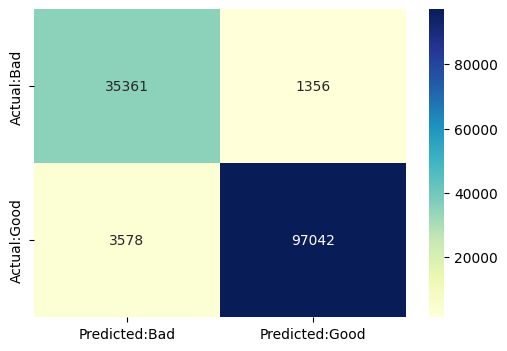

In [34]:
print('Training Accuracy :',lr.score(trainX,trainY))
print('Testing Accuracy :',lr.score(testX,testY))
con_mat = pd.DataFrame(confusion_matrix(lr.predict(testX), testY),
            columns = ['Predicted:Bad', 'Predicted:Good'],
            index = ['Actual:Bad', 'Actual:Good'])


print('\nCLASSIFICATION REPORT\n')
print(classification_report(lr.predict(testX), testY,
                            target_names =['Bad','Good']))

print('\nCONFUSION MATRIX')
plt.figure(figsize= (6,4))
sns.heatmap(con_mat, annot = True,fmt='d',cmap="YlGnBu")